In [416]:
import numpy as np 
import pandas as pd
from mlp import mlp
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

In [24]:
df = pd.read_csv("./dataset/BTC-USD.csv", )
df.Date = pd.to_datetime(df.Date)
print data.head()

        Date         Open         High          Low        Close    Adj Close  \
0 2017-06-06  2870.500000  2880.949951  2626.560059  2691.510010  2691.510010   
1 2017-06-07  2691.510010  2808.409912  2623.610107  2798.780029  2798.780029   
2 2017-06-08  2798.780029  2852.070068  2786.070068  2811.429932  2811.429932   
3 2017-06-09  2811.429932  2914.189941  2807.360107  2900.250000  2900.250000   
4 2017-06-10  2900.250000  2977.860107  2867.250000  2973.449951  2973.449951   

      Volume  
0  340329903  
1  260898606  
2  189237110  
3  246869682  
4  241516660  


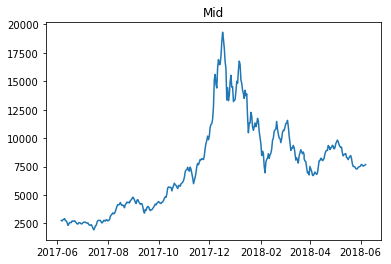

(365,)


In [26]:
mid = ((df.High + df.Low)/2.)
plt.plot(data.Date, mid)
plt.title("Mid")
plt.show()
print mid.shape

## Regressor

In [324]:
# return the time series till the day before to the day after
def series_creator(X, y=None, length=30, extra_days=0):
    m = X.shape[0]
    X_n = []
    y_n = []
    for i in xrange(length, (m-extra_days)):
        X_n.append(X[(i-length):i])
        if y is not None:
            y_n.append(y[i + extra_days])
    
    if y is None:
        return np.vstack((X_n))
    else:
        return np.vstack((X_n)), np.hstack((y_n))
a = np.array([1,   2,  3,  4,  5,  6,  7,  8])
y = np.array([11, 12, 13, 14, 15, 16, 17, 18])
print series_creator(a, y, length=2, extra_days=2)


(array([[1, 2],
       [2, 3],
       [3, 4],
       [4, 5]]), array([15, 16, 17, 18]))


In [392]:
X, y = series_creator(X=mid.values, y=data.High.values, length=15, extra_days=2) # because 1 is default
print X.shape, y.shape
scaler = MinMaxScaler()
scaler.fit(X)
X_std = scaler.transform(X)


(348, 15) (348,)


In [393]:
X_train_std = X_std[:250, :]
y_train = y[:250]
X_test_std = X_std[250:, :]
y_test = y[250:]


In [398]:
reg =  MLPRegressor(algorithm='adam', alpha=0.1, hidden_layer_sizes=(60), random_state=None,
                verbose=False, max_iter=10000, shuffle= False, tol=1e-10)

In [399]:
reg.fit(X_train_std, y_train)
print reg.score(X_test_std, y_test)
pred = reg.predict(X_test_std)

0.3088132199361955


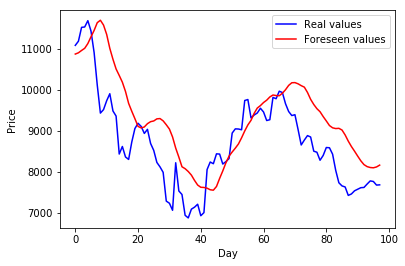

In [400]:
plt.plot(y_test, c='b', label="Real values")
plt.plot(pred, c='r', label="Foreseen values")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend(loc='best')
plt.show()

## Looking the trends (in %)

In [407]:
# return the time series till the day before to the day after, but in % to the previous
def series_creator_percent(X, y=None, length=30, extra_days_to_see=0):
    m = X.shape[0]
    X_n = []
    y_n = []
    for i in xrange(length, (m-extra_days_to_see)):
        X_n.append(X[(i-length):i])
        if y is not None:
            y_n.append(float(y[i + extra_days_to_see])/y[i] - 1)
    
    if y is None:
        return np.vstack((X_n))
    else:
        return np.vstack((X_n)), np.hstack((y_n))
a = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8])
print series_creator_percent(a,y, length=3, extra_days_to_see=1)

(array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]]), array([0.25      , 0.2       , 0.16666667, 0.14285714]))


In [408]:
X, y = series_creator_percent(X=mid.values, y=data.High.values, length=15, extra_days_to_see=3) # because 1 is default
print X.shape, y.shape
scaler = MinMaxScaler()
scaler.fit(X)
X_std = scaler.transform(X)


(347, 15) (347,)


In [409]:
X_train_std = X_std[:250, :]
y_train = y[:250]
X_test_std = X_std[250:, :]
y_test = y[250:]


In [654]:
reg =  MLPRegressor(algorithm='adam', alpha=0.1, hidden_layer_sizes=(60), random_state=None,
                verbose=False, max_iter=10000, shuffle= False, tol=1e-10)

In [655]:
reg.fit(X_train_std, y_train)
print reg.score(X_test_std, y_test)
pred = reg.predict(X_test_std)

-0.008847915855046296


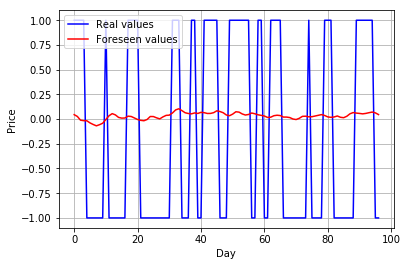

In [656]:
plt.plot(y_test, c='b', label="Real values")
plt.plot(pred, c='r', label="Foreseen values")
plt.xlabel("Day")
plt.grid()
plt.ylabel("Price")
plt.legend(loc='best')
plt.show()

## Looking for trends (binary)

In [657]:
# return the time series till the day before to the day after, but in % to the previous
def series_creator_binary(X, y=None, length=30, extra_days_to_see=0):
    m = X.shape[0]
    X_n = []
    y_n = []
    for i in xrange(length, (m-extra_days_to_see)):
        X_n.append(X[(i-length):i])
        if y is not None:
            a = y[i + extra_days_to_see] - y[i]
            if a >= 0.:
                y_n.append(1.)
            else:
                y_n.append(0)
                
    
    if y is None:
        return np.vstack((X_n))
    else:
        return np.vstack((X_n)), np.hstack((y_n))
a = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8])
print series_creator_binary(a,y, length=3, extra_days_to_see=1)

(array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]]), array([1., 1., 1., 1.]))


In [658]:
X, y = series_creator_binary(X=mid.values, y=data.High.values, length=15, extra_days_to_see=3) # because 1 is default

print X.shape, y.shape
scaler = MinMaxScaler()
scaler.fit(X)
X_std = scaler.transform(X)


(347, 15) (347,)


In [659]:
X_train_std = X_std[:250, :]
y_train = y[:250]
X_test_std = X_std[250:, :]
y_test = y[250:]


In [660]:
clf =  MLPClassifier(algorithm='l-bfgs', alpha=0.1, hidden_layer_sizes=(100), random_state=None,
                verbose=False, max_iter=1000, shuffle= False, tol=1e-10, activation='tanh', momentum=0.9)
#clf = mlp(seed=None, activation="tanh", max_iter=1000,
#          hidden_layer_size=30, alpha=0.1, momentum=0.9,tol=1e-10,
#          weight_range=(-1,1), bias=True, classifier=True)

In [661]:
clf.fit(X_train_std, y_train)

print clf.score(X_test_std, y_test)
pred = clf.predict(X_test_std)

0.4845360824742268


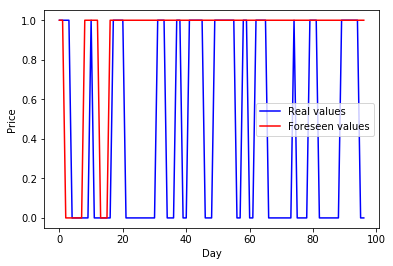

In [662]:
plt.plot(y_test, c='b', label="Real values")
plt.plot(pred, c='r', label="Foreseen values")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend(loc='best')
plt.show()

## Multi output regressor

In [692]:
# return the time series till the day before to the day after
def series_creator_multi(X, y=None, length=30, days=0):
    m = X.shape[0]
    X_n = []
    y_n = []
    for i in xrange(length, m-days):
        X_n.append(X[(i-length):i])
        if y is not None:
            y_n.append(y[i-1:i + days-1])
    
    if y is None:
        return np.vstack((X_n))
    else:
        return np.vstack((X_n)), np.vstack((y_n))
a = np.array([1,   2,  3,  4,  5,  6,  7,  8])
y = np.array([11, 12, 13, 14, 15, 16, 17, 18])
a,b = series_creator_multi(a, y, length=1, days=3)
print a, "\n"
print b

[[1]
 [2]
 [3]
 [4]] 

[[11 12 13]
 [12 13 14]
 [13 14 15]
 [14 15 16]]


In [758]:
X, y = series_creator_multi(X=mid.values, y=data.High.values, length=15, days=3) # because 1 is default
print X.shape, y.shape
scaler = MinMaxScaler()
scaler.fit(X)
X_std = scaler.transform(X)


(347, 15) (347, 3)


In [759]:
X_train_std = X_std[:250, :]
y_train = y[:250, :]
X_test_std = X_std[250:, :]
y_test = y[250:,:]


In [760]:
reg =  MLPRegressor(algorithm='l-bfgs', alpha=0.1, hidden_layer_sizes=(100), random_state=None,
                verbose=False, max_iter=10000, shuffle= False, tol=1e-10, activation="tanh")

In [761]:
reg.fit(X_train_std, y_train)
print reg.score(X_test_std, y_test)
pred = reg.predict(X_test_std)

-1.9964343549528576


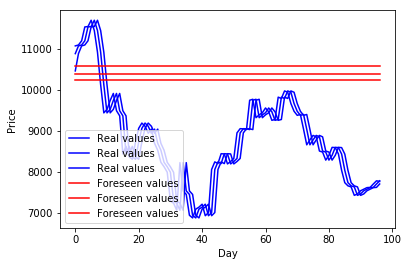

In [762]:
plt.plot(y_test, c='b', label="Real values")
plt.plot(pred, c='r', label="Foreseen values")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend(loc='best')
plt.show()

In [746]:
print y[-1, :]
print pred[-1,:]
print " y tendence:", y[-1, -1] - y[-1, 0]
print " pred tendence:", pred[-1, -1] - pred[-1, 0]

[7697.339844 7774.959961 7760.72998 ]
[10131.35870331 10281.30471575 10433.19425704]
 y tendence: 63.390135999999984
 pred tendence: 301.8355537268344


In [739]:
#testing the predictions
p = pred[:, -1] - pred[:, 0] 
y_res = y_test[:, -1] - y_test[:, 0]

#p = np.where(1, p>=0.5, 0)
#y_res = np.where(1, y_res>=0.5, 0)


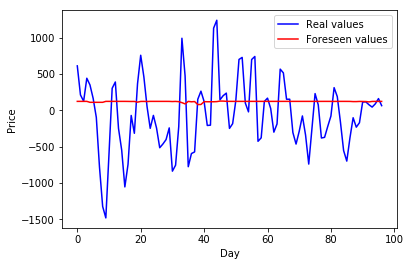

In [740]:
plt.plot(y_res, c='b', label="Real values")
plt.plot(p, c='r', label="Foreseen values")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend(loc='best')
plt.show()
